In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
np.random.seed(42)

In [ ]:
data = {
    'ZIP Code': [f'{i:05}' for i in range(10001, 10101)],
    'State': np.random.choice(['Mississippi', 'New Mexico', 'Massachusetts', 'Minnesota'], 100),
    'Avg Distance to Nearest Hospital (miles)': np.random.randint(1, 35, 100),
    'Income Level': np.random.randint(20000, 100000, 100),
    'Education Level': np.random.randint(1, 4, 100),
    'Car Ownership Rate (%)': np.random.uniform(30, 100, 100),
    'Unemployment Rate (%)': np.random.uniform(2, 15, 100),
    'Latitude': np.random.uniform(34.001, 45.000, 100),
    'Longitude': np.random.uniform(-106.000, -70.000, 100)
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
X_kmeans = df[['Avg Distance to Nearest Hospital (miles)', 'Income Level', 'Education Level', 'Car Ownership Rate (%)']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_kmeans)

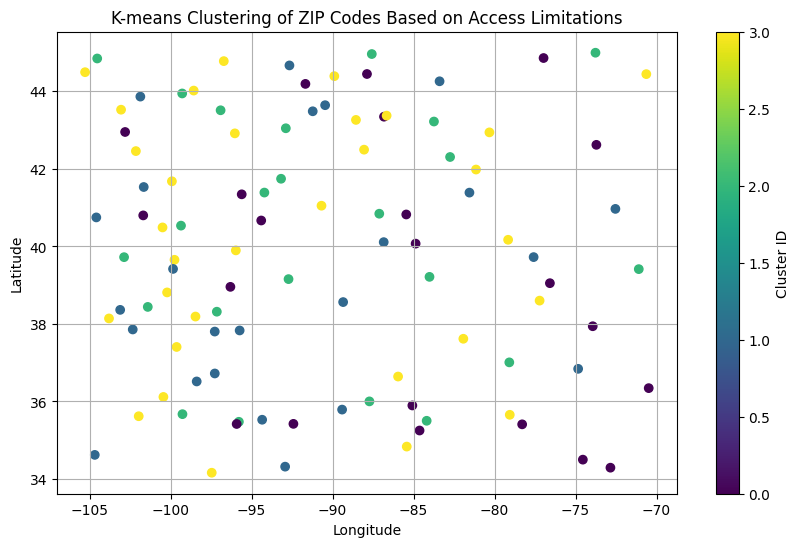

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering of ZIP Codes Based on Access Limitations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.colorbar(label='Cluster ID')
plt.show()

In [ ]:
X_reg = df[['Avg Distance to Nearest Hospital (miles)', 'Income Level', 'Education Level', 'Car Ownership Rate (%)', 'Unemployment Rate (%)']]
y_reg = df['Avg Distance to Nearest Hospital (miles)']

In [ ]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
model.fit(X_reg, y_reg)

GradientBoostingRegressor(random_state=0)

In [ ]:
df['Predicted Distance'] = model.predict(X_reg)

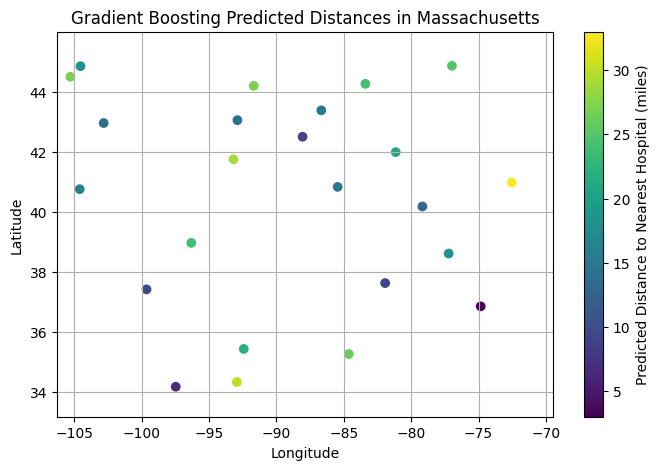

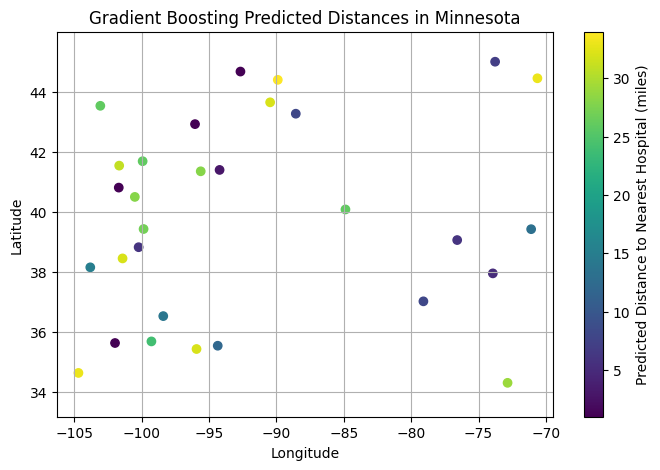

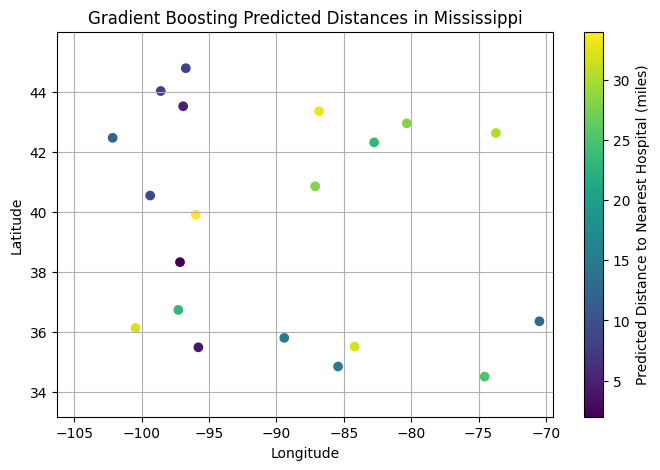

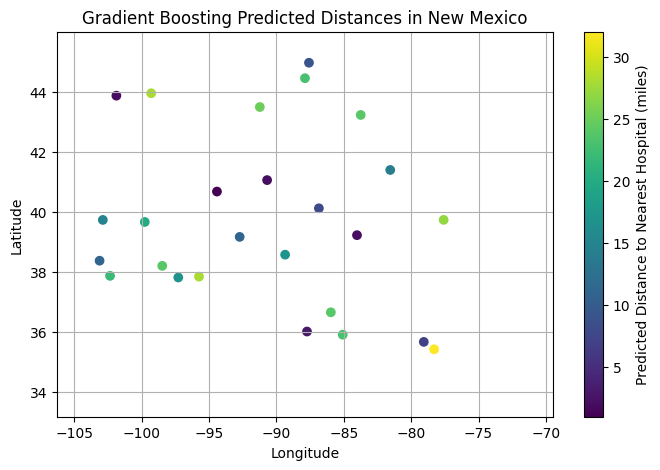

In [ ]:
for state in df['State'].unique():
    df_state = df[df['State'] == state]

    plt.figure(figsize=(8, 5))
    plt.scatter(df_state['Longitude'], df_state['Latitude'], c=df_state['Predicted Distance'], cmap='viridis', marker='o')
    plt.colorbar(label='Predicted Distance to Nearest Hospital (miles)')
    plt.title(f'Gradient Boosting Predicted Distances in {state}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.xlim(df['Longitude'].min() - 1, df['Longitude'].max() + 1)
    plt.ylim(df['Latitude'].min() - 1, df['Latitude'].max() + 1)
    plt.show()